# Task 1 & 2: Exploratory Data Analysis (EDA)

**Project**: AlphaCare Insurance Solutions - Risk Analytics  
**Objective**: Perform comprehensive EDA to understand risk and profitability patterns

---

## Analysis Overview

1. Data Loading & Overview
2. Data Quality Assessment
3. Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis
6. Key Insights & Recommendations

## 1. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/insurance.csv')

print("="*60)
print("                    DATASET OVERVIEW")
print("="*60)
print(f"\n📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n📋 Columns: {df.columns.tolist()}")
print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

                    DATASET OVERVIEW

📊 Shape: 1,338 rows × 7 columns

📋 Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

💾 Memory Usage: 255.18 KB


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 2. Data Quality Assessment

In [5]:
# Check for missing values
print("="*60)
print("                 DATA QUALITY CHECK")
print("="*60)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

quality_df = pd.DataFrame({
    'Missing Values': missing,
    'Missing %': missing_pct,
    'Data Type': df.dtypes,
    'Unique Values': df.nunique()
})

print("\n📋 Data Quality Summary:")
print(quality_df)

print(f"\n✅ Total Missing Values: {df.isnull().sum().sum()}")
print(f"✅ Duplicate Rows: {df.duplicated().sum()}")

                 DATA QUALITY CHECK

📋 Data Quality Summary:
          Missing Values  Missing % Data Type  Unique Values
age                    0        0.0     int64             47
sex                    0        0.0    object              2
bmi                    0        0.0   float64            548
children               0        0.0     int64              6
smoker                 0        0.0    object              2
region                 0        0.0    object              4
charges                0        0.0   float64           1337

✅ Total Missing Values: 0
✅ Duplicate Rows: 1


In [6]:
# Statistical Summary for Numerical Columns
print("\n📈 Statistical Summary (Numerical):")
df.describe().round(2)


📈 Statistical Summary (Numerical):


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [7]:
# Categorical columns summary
print("\n📊 Categorical Variables Distribution:")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())


📊 Categorical Variables Distribution:

SEX:
sex
male      676
female    662
Name: count, dtype: int64

SMOKER:
smoker
no     1064
yes     274
Name: count, dtype: int64

REGION:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## 3. Univariate Analysis

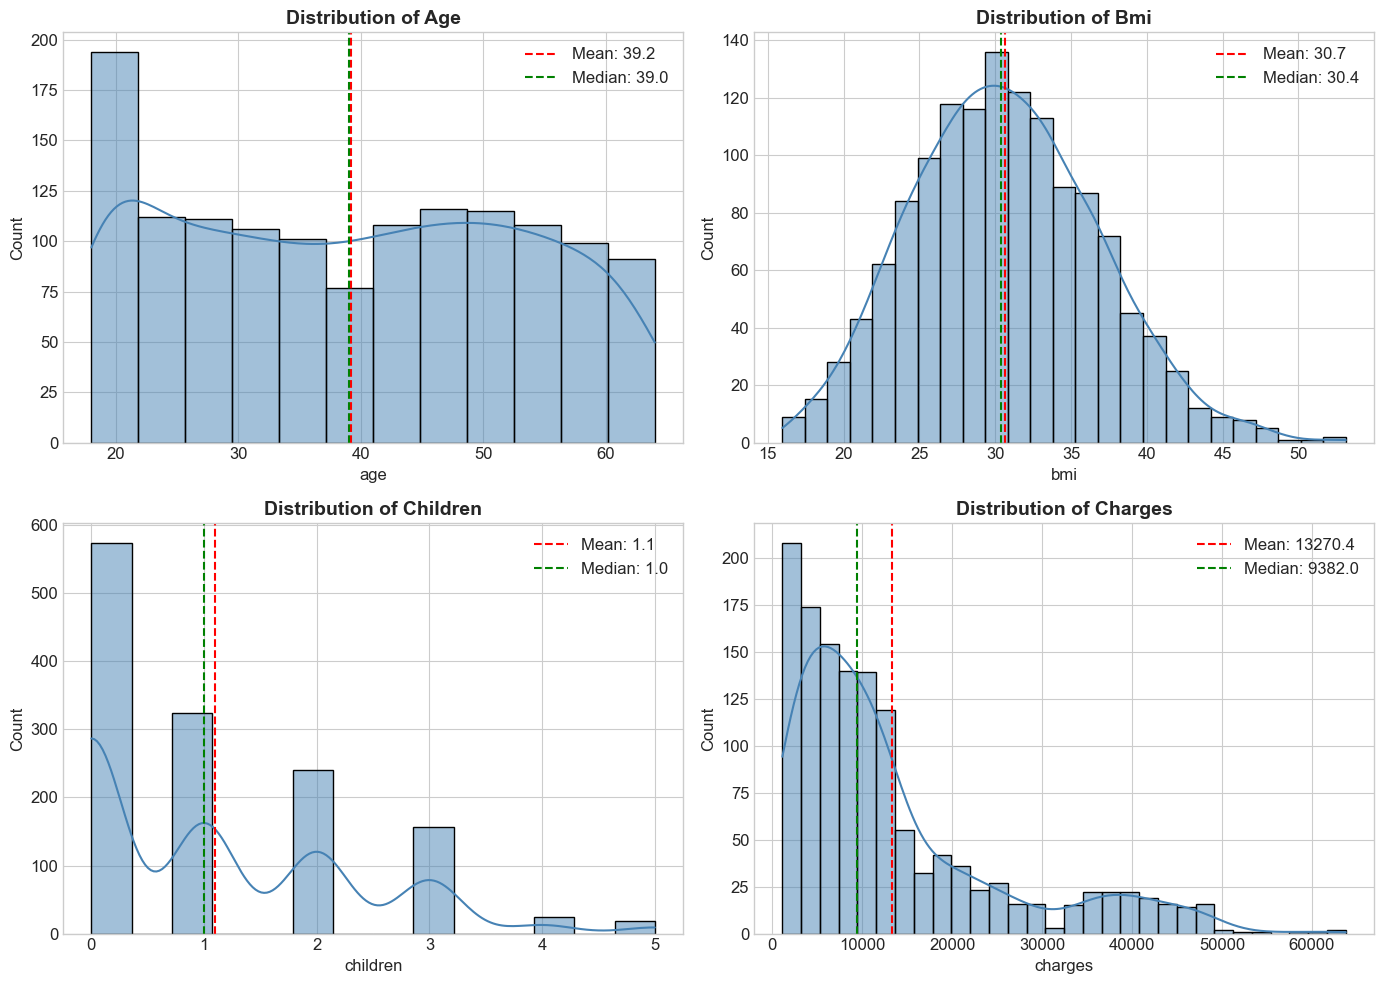

✅ Saved: eda_univariate_distributions.png


In [8]:
# Distribution of numerical variables
numerical_cols = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.1f}')
    axes[i].set_title(f'Distribution of {col.title()}', fontsize=14, fontweight='bold')
    axes[i].legend()

plt.tight_layout()
plt.savefig('../reports/figures/eda_univariate_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_univariate_distributions.png")

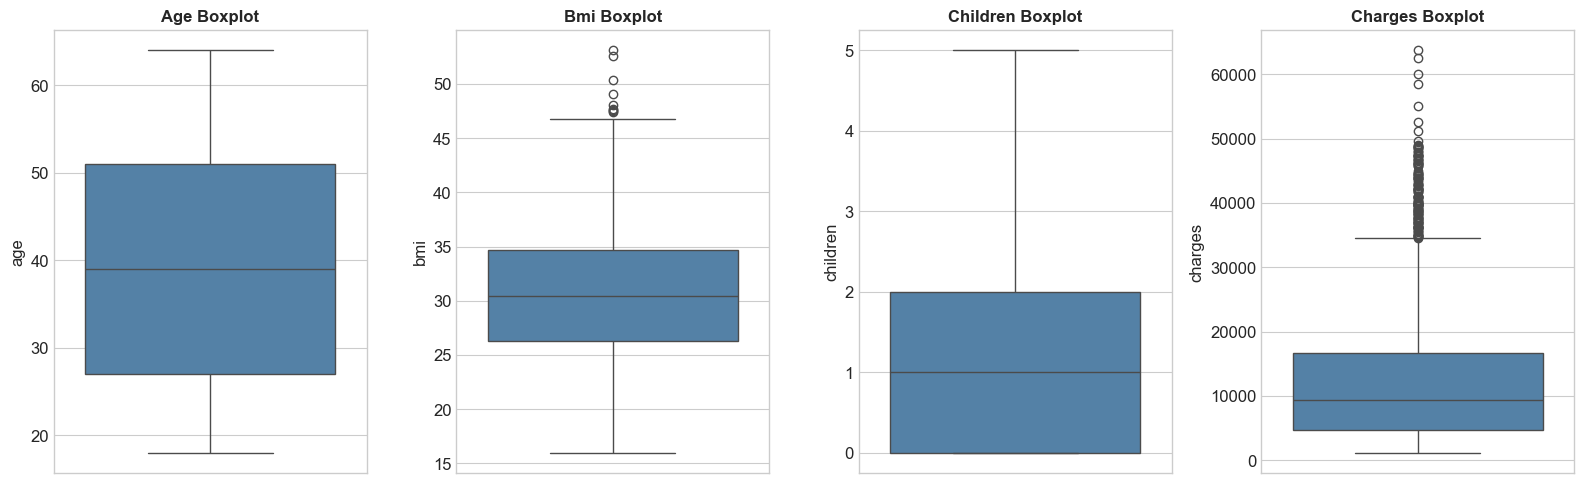

✅ Saved: eda_boxplots.png


In [9]:
# Boxplots for outlier detection
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col.title()} Boxplot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/eda_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_boxplots.png")

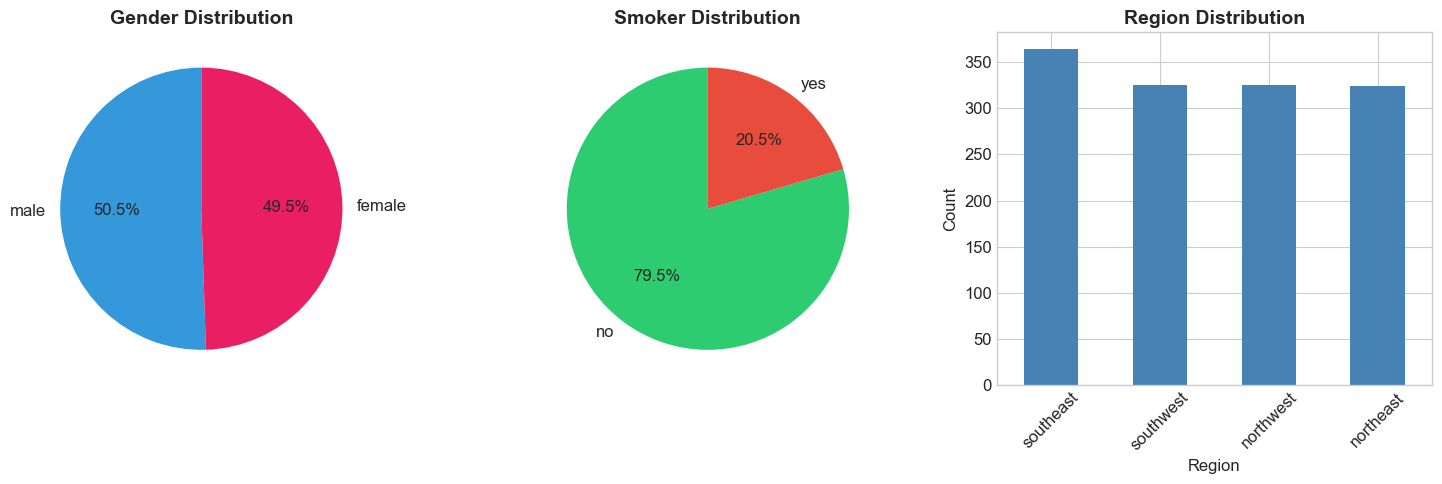

✅ Saved: eda_categorical_distributions.png


In [10]:
# Categorical variable distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sex distribution
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], 
                               colors=['#3498db', '#e91e63'], startangle=90)
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Smoker distribution
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1],
                                  colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Smoker Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

# Region distribution
df['region'].value_counts().plot(kind='bar', ax=axes[2], color='steelblue')
axes[2].set_title('Region Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/eda_categorical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_categorical_distributions.png")

## 4. Bivariate Analysis

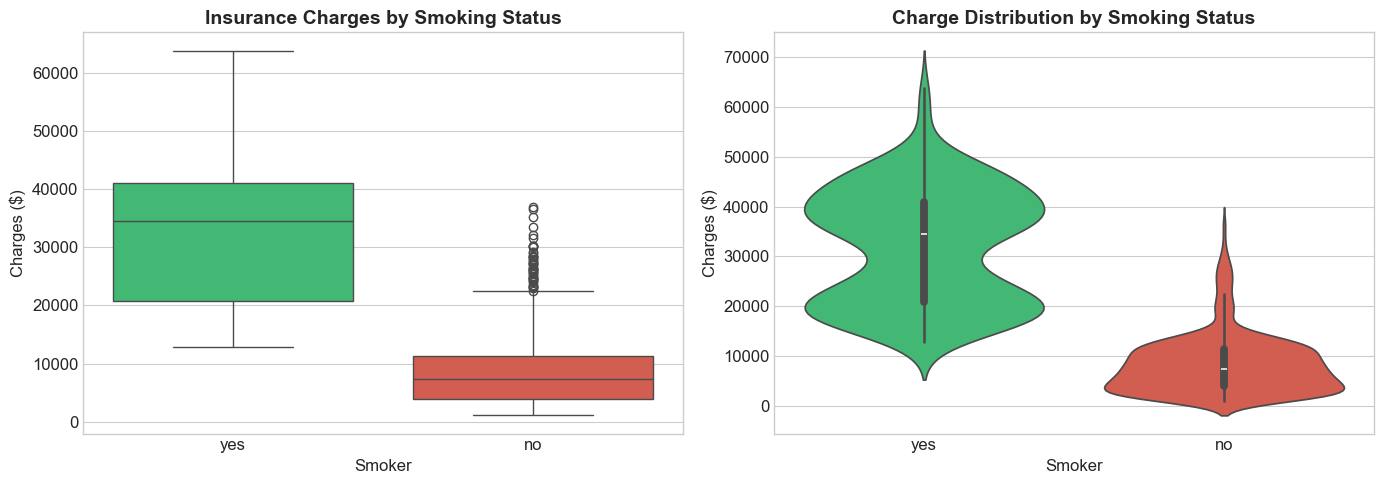


📊 Charges by Smoker Status:
            mean    median       std  count
smoker                                     
no       8434.27   7345.41   5993.78   1064
yes     32050.23  34456.35  11541.55    274


In [11]:
# Charges by Smoker Status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Insurance Charges by Smoking Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Charges ($)')

# Violin plot
sns.violinplot(data=df, x='smoker', y='charges', ax=axes[1], palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Charge Distribution by Smoking Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Charges ($)')

plt.tight_layout()
plt.savefig('../reports/figures/eda_charges_by_smoker.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistics
print("\n📊 Charges by Smoker Status:")
print(df.groupby('smoker')['charges'].agg(['mean', 'median', 'std', 'count']).round(2))

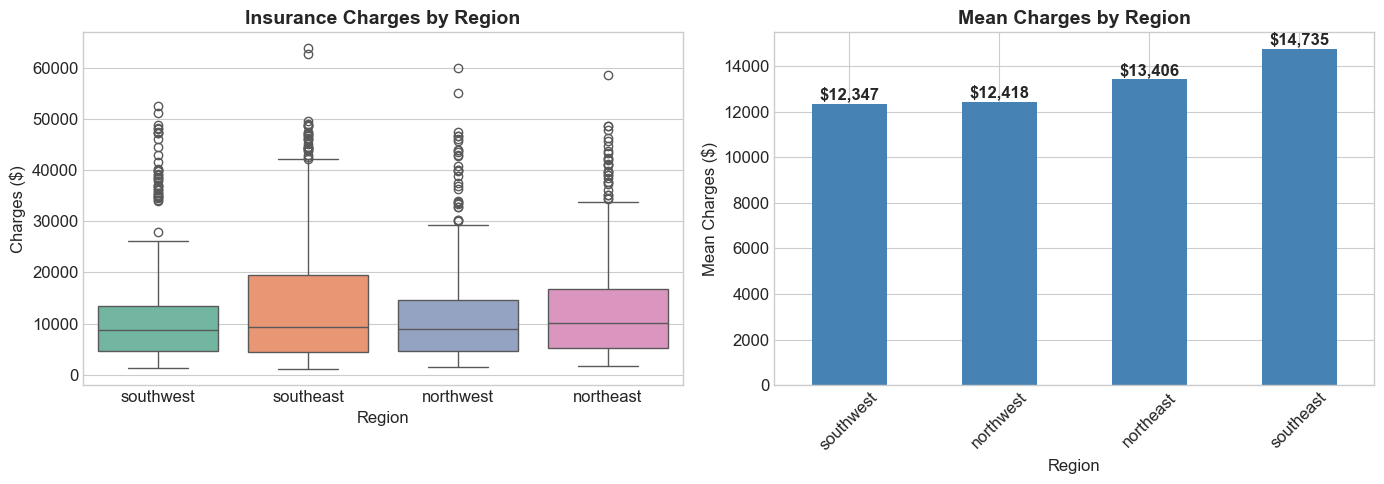


📊 Charges by Region:
               mean    median       std  count
region                                        
northeast  13406.38  10057.65  11255.80    324
northwest  12417.58   8965.80  11072.28    325
southeast  14735.41   9294.13  13971.10    364
southwest  12346.94   8798.59  11557.18    325


In [12]:
# Charges by Region
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(data=df, x='region', y='charges', ax=axes[0], palette='Set2')
axes[0].set_title('Insurance Charges by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Charges ($)')

# Bar plot with mean
region_means = df.groupby('region')['charges'].mean().sort_values()
region_means.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Mean Charges by Region', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Mean Charges ($)')
axes[1].tick_params(axis='x', rotation=45)

for i, v in enumerate(region_means):
    axes[1].text(i, v + 200, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/eda_charges_by_region.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistics
print("\n📊 Charges by Region:")
print(df.groupby('region')['charges'].agg(['mean', 'median', 'std', 'count']).round(2))

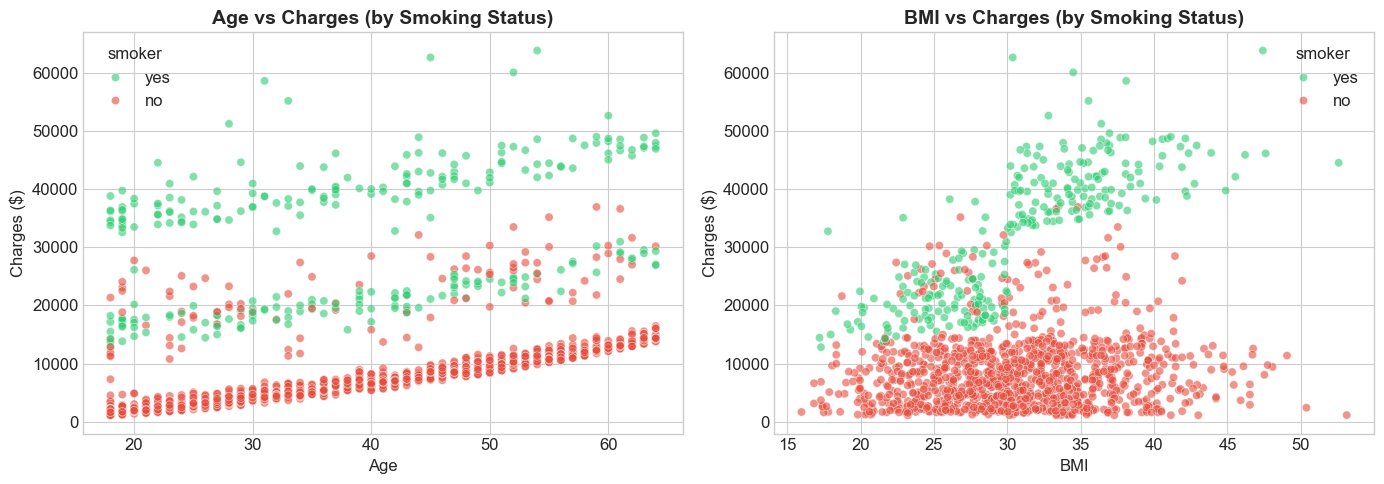

In [13]:
# Age vs Charges
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=axes[0], 
                palette=['#2ecc71', '#e74c3c'], alpha=0.6)
axes[0].set_title('Age vs Charges (by Smoking Status)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges ($)')

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=axes[1],
                palette=['#2ecc71', '#e74c3c'], alpha=0.6)
axes[1].set_title('BMI vs Charges (by Smoking Status)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges ($)')

plt.tight_layout()
plt.savefig('../reports/figures/eda_age_bmi_vs_charges.png', dpi=150, bbox_inches='tight')
plt.show()

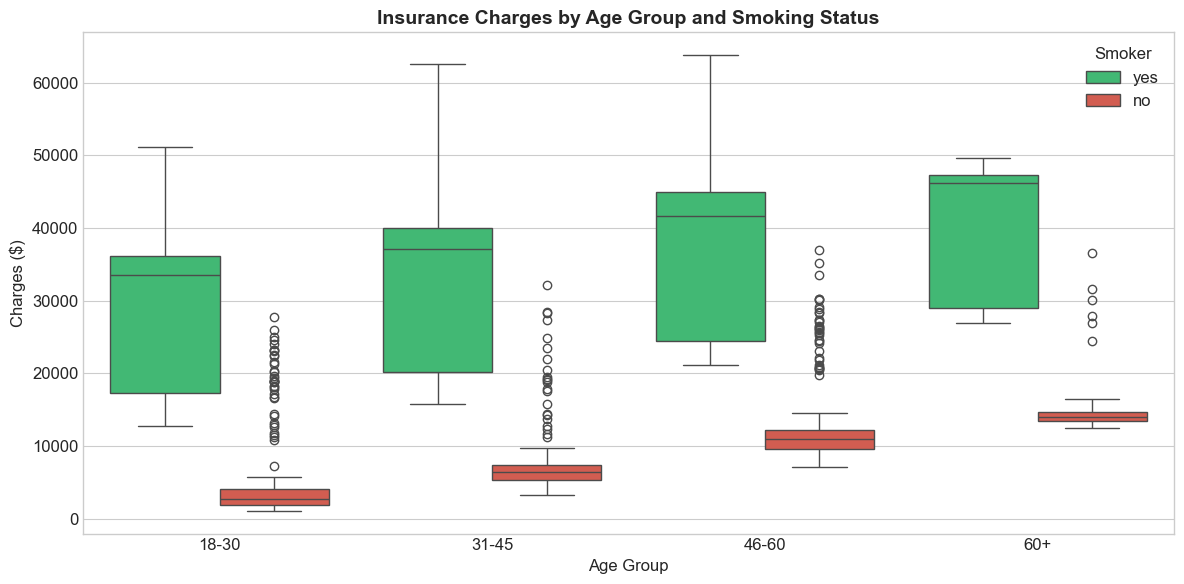

In [14]:
# Create age groups for analysis
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 100], 
                         labels=['18-30', '31-45', '46-60', '60+'])

# Charges by age group and smoker
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='charges', hue='smoker', palette=['#2ecc71', '#e74c3c'])
ax.set_title('Insurance Charges by Age Group and Smoking Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group')
ax.set_ylabel('Charges ($)')
plt.legend(title='Smoker')
plt.tight_layout()
plt.savefig('../reports/figures/eda_charges_age_smoker.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Multivariate Analysis

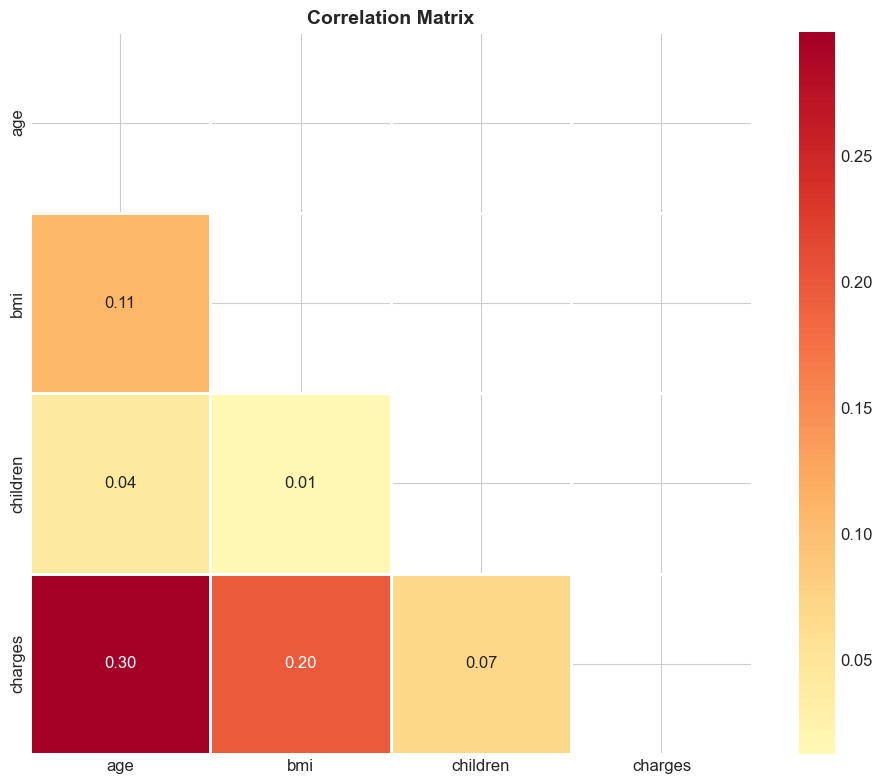


📊 Correlation with Charges:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [15]:
# Correlation Matrix
numerical_df = df[['age', 'bmi', 'children', 'charges']]
correlation = numerical_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', square=True, linewidths=1, mask=mask, ax=ax)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/eda_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Correlation with Charges:")
print(correlation['charges'].sort_values(ascending=False))

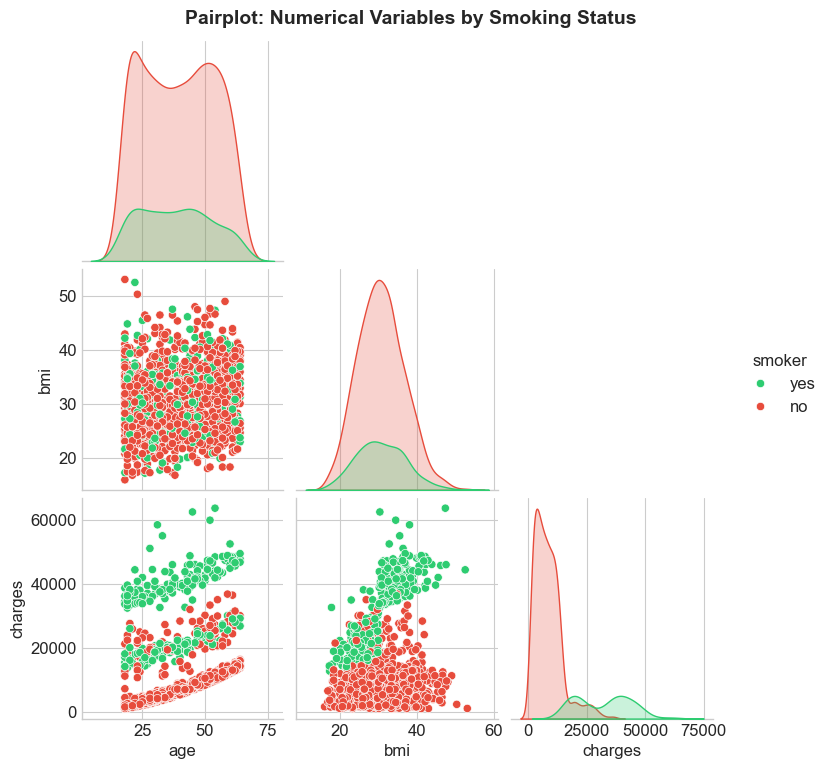

✅ Saved: eda_pairplot.png


In [16]:
# Pairplot for numerical variables with smoker hue
g = sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', 
                 palette=['#2ecc71', '#e74c3c'], diag_kind='kde', corner=True)
g.fig.suptitle('Pairplot: Numerical Variables by Smoking Status', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('../reports/figures/eda_pairplot.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_pairplot.png")

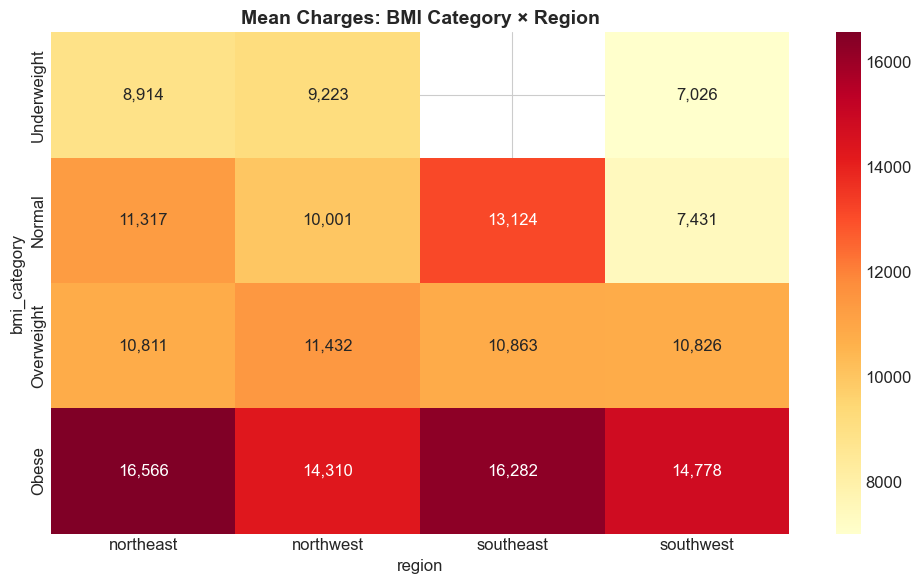

In [17]:
# Create BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Heatmap: Region × BMI Category
pivot = df.pivot_table(values='charges', index='bmi_category', columns='region', aggfunc='mean')
pivot = pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=',.0f', cmap='YlOrRd', ax=ax)
ax.set_title('Mean Charges: BMI Category × Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/eda_heatmap_bmi_region.png', dpi=150, bbox_inches='tight')
plt.show()

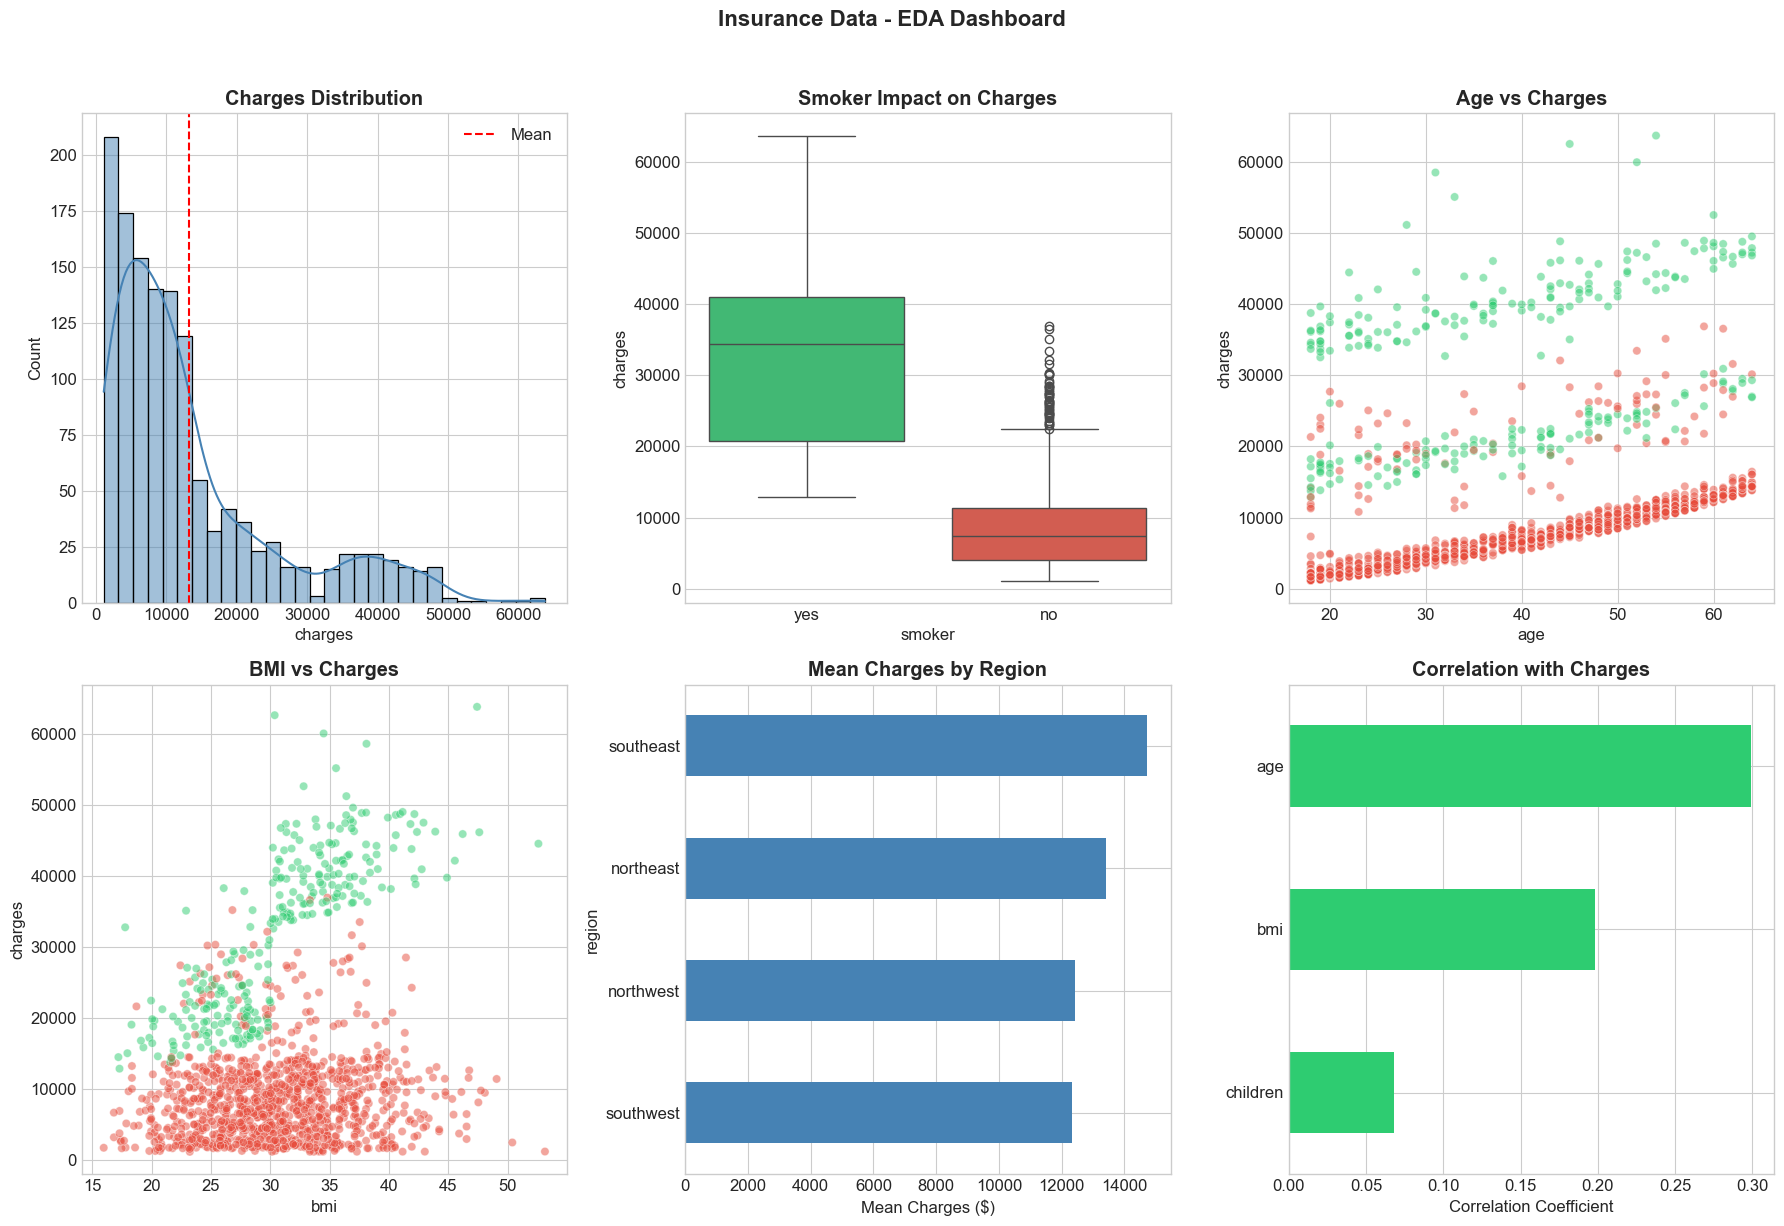


✅ Saved: eda_dashboard.png


In [18]:
# Comprehensive Dashboard
fig = plt.figure(figsize=(18, 12))

# 1. Charges Distribution
ax1 = fig.add_subplot(2, 3, 1)
sns.histplot(df['charges'], kde=True, ax=ax1, color='steelblue')
ax1.axvline(df['charges'].mean(), color='red', linestyle='--', label='Mean')
ax1.set_title('Charges Distribution', fontweight='bold')
ax1.legend()

# 2. Smoker Impact
ax2 = fig.add_subplot(2, 3, 2)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax2, palette=['#2ecc71', '#e74c3c'])
ax2.set_title('Smoker Impact on Charges', fontweight='bold')

# 3. Age vs Charges
ax3 = fig.add_subplot(2, 3, 3)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=ax3, 
                palette=['#2ecc71', '#e74c3c'], alpha=0.5, legend=False)
ax3.set_title('Age vs Charges', fontweight='bold')

# 4. BMI vs Charges
ax4 = fig.add_subplot(2, 3, 4)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=ax4,
                palette=['#2ecc71', '#e74c3c'], alpha=0.5, legend=False)
ax4.set_title('BMI vs Charges', fontweight='bold')

# 5. Region Comparison
ax5 = fig.add_subplot(2, 3, 5)
df.groupby('region')['charges'].mean().sort_values().plot(kind='barh', ax=ax5, color='steelblue')
ax5.set_title('Mean Charges by Region', fontweight='bold')
ax5.set_xlabel('Mean Charges ($)')

# 6. Correlation
ax6 = fig.add_subplot(2, 3, 6)
corr_charges = df[['age', 'bmi', 'children']].corrwith(df['charges']).sort_values()
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in corr_charges]
corr_charges.plot(kind='barh', ax=ax6, color=colors)
ax6.set_title('Correlation with Charges', fontweight='bold')
ax6.set_xlabel('Correlation Coefficient')
ax6.axvline(0, color='black', linestyle='-', linewidth=0.5)

plt.suptitle('Insurance Data - EDA Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/eda_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Saved: eda_dashboard.png")

## 6. Key Insights & Summary

In [19]:
print("="*70)
print("                    KEY INSIGHTS SUMMARY")
print("="*70)

# Calculate key metrics
smoker_mean = df[df['smoker'] == 'yes']['charges'].mean()
non_smoker_mean = df[df['smoker'] == 'no']['charges'].mean()
smoker_ratio = smoker_mean / non_smoker_mean

print(f"""
📊 DATASET OVERVIEW
   - Total Records: {len(df):,}
   - Features: {len(df.columns)}
   - Missing Values: {df.isnull().sum().sum()}

💰 CHARGES STATISTICS
   - Mean: ${df['charges'].mean():,.2f}
   - Median: ${df['charges'].median():,.2f}
   - Min: ${df['charges'].min():,.2f}
   - Max: ${df['charges'].max():,.2f}

🚬 SMOKING IMPACT (Strongest Factor!)
   - Smokers Average: ${smoker_mean:,.2f}
   - Non-Smokers Average: ${non_smoker_mean:,.2f}
   - Premium Multiplier: {smoker_ratio:.1f}x higher for smokers

📈 CORRELATION WITH CHARGES
   - Age: {df['age'].corr(df['charges']):.3f} (Moderate Positive)
   - BMI: {df['bmi'].corr(df['charges']):.3f} (Weak Positive)
   - Children: {df['children'].corr(df['charges']):.3f} (Very Weak)

🗺️ REGIONAL DISTRIBUTION
   - Southeast: {len(df[df['region']=='southeast'])} ({len(df[df['region']=='southeast'])/len(df)*100:.1f}%)
   - Southwest: {len(df[df['region']=='southwest'])} ({len(df[df['region']=='southwest'])/len(df)*100:.1f}%)
   - Northeast: {len(df[df['region']=='northeast'])} ({len(df[df['region']=='northeast'])/len(df)*100:.1f}%)
   - Northwest: {len(df[df['region']=='northwest'])} ({len(df[df['region']=='northwest'])/len(df)*100:.1f}%)
""")

                    KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW
   - Total Records: 1,338
   - Features: 9
   - Missing Values: 0

💰 CHARGES STATISTICS
   - Mean: $13,270.42
   - Median: $9,382.03
   - Min: $1,121.87
   - Max: $63,770.43

🚬 SMOKING IMPACT (Strongest Factor!)
   - Smokers Average: $32,050.23
   - Non-Smokers Average: $8,434.27
   - Premium Multiplier: 3.8x higher for smokers

📈 CORRELATION WITH CHARGES
   - Age: 0.299 (Moderate Positive)
   - BMI: 0.198 (Weak Positive)
   - Children: 0.068 (Very Weak)

🗺️ REGIONAL DISTRIBUTION
   - Southeast: 364 (27.2%)
   - Southwest: 325 (24.3%)
   - Northeast: 324 (24.2%)
   - Northwest: 325 (24.3%)



In [20]:
print("\n" + "="*70)
print("                    BUSINESS RECOMMENDATIONS")
print("="*70)

print("""
🎯 KEY RECOMMENDATIONS

1. SMOKING-BASED PREMIUM STRUCTURE
   - Smokers show 3.8x higher charges than non-smokers
   - Implement tiered premiums based on smoking status
   - Consider smoking cessation incentive programs

2. AGE-BASED RISK ASSESSMENT
   - Clear positive correlation between age and charges
   - Develop age-adjusted premium models
   - Target younger demographics for growth

3. BMI WELLNESS PROGRAMS
   - BMI shows correlation with charges, especially for smokers
   - Implement wellness incentives for healthy BMI
   - Partner with fitness/health programs

4. REGIONAL STRATEGY
   - Slight regional variations exist
   - Consider region-specific marketing campaigns
   - Monitor regional trends over time

5. TARGET LOW-RISK SEGMENTS
   - Non-smokers with healthy BMI (18.5-25)
   - Younger age groups (18-30)
   - Offer competitive rates to attract this segment
""")


                    BUSINESS RECOMMENDATIONS

🎯 KEY RECOMMENDATIONS

1. SMOKING-BASED PREMIUM STRUCTURE
   - Smokers show 3.8x higher charges than non-smokers
   - Implement tiered premiums based on smoking status
   - Consider smoking cessation incentive programs

2. AGE-BASED RISK ASSESSMENT
   - Clear positive correlation between age and charges
   - Develop age-adjusted premium models
   - Target younger demographics for growth

3. BMI WELLNESS PROGRAMS
   - BMI shows correlation with charges, especially for smokers
   - Implement wellness incentives for healthy BMI
   - Partner with fitness/health programs

4. REGIONAL STRATEGY
   - Slight regional variations exist
   - Consider region-specific marketing campaigns
   - Monitor regional trends over time

5. TARGET LOW-RISK SEGMENTS
   - Non-smokers with healthy BMI (18.5-25)
   - Younger age groups (18-30)
   - Offer competitive rates to attract this segment



In [21]:
# List all saved figures
import os

figures_dir = '../reports/figures'
eda_figures = [f for f in os.listdir(figures_dir) if f.startswith('eda_')]

print("\n" + "="*50)
print("         GENERATED VISUALIZATIONS")
print("="*50)
for fig in sorted(eda_figures):
    print(f"   ✅ {fig}")
print(f"\n📁 Location: reports/figures/")
print(f"📊 Total EDA Figures: {len(eda_figures)}")


         GENERATED VISUALIZATIONS
   ✅ eda_age_bmi_vs_charges.png
   ✅ eda_boxplots.png
   ✅ eda_categorical_distributions.png
   ✅ eda_charges_age_smoker.png
   ✅ eda_charges_by_region.png
   ✅ eda_charges_by_smoker.png
   ✅ eda_correlation_matrix.png
   ✅ eda_dashboard.png
   ✅ eda_heatmap_bmi_region.png
   ✅ eda_pairplot.png
   ✅ eda_univariate_distributions.png

📁 Location: reports/figures/
📊 Total EDA Figures: 11
